In [1]:
! pip install torch

  Using cached torch-2.7.0-cp313-cp313-win_amd64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 1.8/212.5 MB 9.5 MB/s eta 0:00:23
   - -------------------------------------- 10.5/212.5 MB 27.8 MB/s eta 0:00:08
   ----- ---------------------------------- 27.8/212.5 MB 48.4 MB/s eta 0:00:04
   ------- -------------------------------- 38.0/212.5 MB 56.5 MB/s eta 0:00:04
   ---------- ----------------------------- 53.5/212.5 MB 56.8 MB/s eta 0:00:03
   ---------- ----------------------------- 57.7/212.5 MB 48.8 MB/s e

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.1 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 21.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------- ----- 10.7/12.6 MB 50.8 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 37.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 58.7 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ---

In [4]:
! pip install pandas numpy

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.5 MB 6.9 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 19.6 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
  

In [6]:
%matplotlib inline 
# figures putput under the cell rather than using plt.show()

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import pandas as pd
import numpy as np

import torch

In [13]:
import urllib.request
url = "https://github.com/kundajelab/dragonn/raw/master/paper_supplement/simulation_data/GC_fraction0.4motif_nameTAL1_known4num_neg10000num_pos10000seq_length500.npz"
filename = "TAL1_data.npz"
urllib.request.urlretrieve(url, filename)
print(f"save as {filename}")

save as TAL1_data.npz


In [15]:
import os

In [17]:
print(os.path.abspath("TAL1_data.npz"))  
# output complete path

C:\Users\Yang Guo\TAL1_data.npz


In [21]:
def load_simulated_data(path):

    data = np.load(path)

    x_train = data["X_train"].squeeze(1).swapaxes(1,2)
    x_valid = data["X_valid"].squeeze(1).swapaxes(1,2)
    y_train = data['y_train']
    y_valid = data['y_valid']
    return (x_train, y_train), (x_valid, y_valid)

In [23]:
(x_train, y_train), (x_test, y_test) = load_simulated_data(os.path.abspath("TAL1_data.npz"))

In [24]:
x_train.shape

(12800, 500, 4)

In [25]:
y_train.shape

(12800, 1)

In [26]:
x_test

array([[[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       ...,

       [[1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1]],

       [[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [1, 0, 0, 0]],

       [[1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]]], shape=(3200, 500, 4), dtype=int8)

In [27]:
y_test.shape

(3200, 1)

In [28]:
def plot_a(ax, base, left_edge, height, color):
    a_polygon_coords = [
        np.array([
           [0.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.8],
           [0.2, 0.0],
        ]),
        np.array([
           [1.0, 0.0],
           [0.5, 1.0],
           [0.5, 0.8],
           [0.8, 0.0],
        ]),
        np.array([
           [0.225, 0.45],
           [0.775, 0.45],
           [0.85, 0.3],
           [0.15, 0.3],
        ])
    ]
    for polygon_coords in a_polygon_coords:
        ax.add_patch(mpl.patches.Polygon((np.array([1,height])[None,:]*polygon_coords
                                                 + np.array([left_edge,base])[None,:]),
                                                facecolor=color, edgecolor=color))


def plot_c(ax, base, left_edge, height, color):
    ax.add_patch(mpl.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
                                            facecolor=color, edgecolor=color))
    ax.add_patch(mpl.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
                                            facecolor='white', edgecolor='white'))
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge+1, base], width=1.0, height=height,
                                            facecolor='white', edgecolor='white', fill=True))


def plot_g(ax, base, left_edge, height, color):
    ax.add_patch(mpl.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=1.3, height=height,
                                            facecolor=color, edgecolor=color))
    ax.add_patch(mpl.patches.Ellipse(xy=[left_edge+0.65, base+0.5*height], width=0.7*1.3, height=0.7*height,
                                            facecolor='white', edgecolor='white'))
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge+1, base], width=1.0, height=height,
                                            facecolor='white', edgecolor='white', fill=True))
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge+0.825, base+0.085*height], width=0.174, height=0.415*height,
                                            facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge+0.625, base+0.35*height], width=0.374, height=0.15*height,
                                            facecolor=color, edgecolor=color, fill=True))


def plot_t(ax, base, left_edge, height, color):
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge+0.4, base],
                  width=0.2, height=height, facecolor=color, edgecolor=color, fill=True))
    ax.add_patch(mpl.patches.Rectangle(xy=[left_edge, base+0.8*height],
                  width=1.0, height=0.2*height, facecolor=color, edgecolor=color, fill=True))

default_colors = {0:'green', 1:'blue', 2:'orange', 3:'red'}
default_plot_funcs = {0:plot_a, 1:plot_c, 2:plot_g, 3:plot_t}
def plot_weights_given_ax(ax, array,
                 figsize=(20,2),
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency=1.0,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={},
                 ylabel=""):
    if len(array.shape)==3:
        array = np.squeeze(array)
    assert len(array.shape)==2, array.shape
    if (array.shape[0]==4 and array.shape[1] != 4):
        array = array.transpose(1,0)
    assert array.shape[1]==4
    max_pos_height = 0.0
    min_neg_height = 0.0
    heights_at_positions = []
    depths_at_positions = []
    for i in range(array.shape[0]):
        #sort from smallest to highest magnitude
        acgt_vals = sorted(enumerate(array[i,:]), key=lambda x: abs(x[1]))
        positive_height_so_far = 0.0
        negative_height_so_far = 0.0
        for letter in acgt_vals:
            plot_func = plot_funcs[letter[0]]
            color=colors[letter[0]]
            if (letter[1] > 0):
                height_so_far = positive_height_so_far
                positive_height_so_far += letter[1]
            else:
                height_so_far = negative_height_so_far
                negative_height_so_far += letter[1]
            plot_func(ax=ax, base=height_so_far, left_edge=i, height=letter[1], color=color)
        max_pos_height = max(max_pos_height, positive_height_so_far)
        min_neg_height = min(min_neg_height, negative_height_so_far)
        heights_at_positions.append(positive_height_so_far)
        depths_at_positions.append(negative_height_so_far)

    #now highlight any desired positions; the key of
    #the highlight dict should be the color
    for color in highlight:
        for start_pos, end_pos in highlight[color]:
            assert start_pos >= 0.0 and end_pos <= array.shape[0]
            min_depth = np.min(depths_at_positions[start_pos:end_pos])
            max_height = np.max(heights_at_positions[start_pos:end_pos])
            ax.add_patch(
                mpl.patches.Rectangle(xy=[start_pos,min_depth],
                    width=end_pos-start_pos,
                    height=max_height-min_depth,
                    edgecolor=color, fill=False))

    ax.set_xlim(-length_padding, array.shape[0]+length_padding)
    ax.xaxis.set_ticks(np.arange(0.0, array.shape[0]+1, subticks_frequency))
    height_padding = max(abs(min_neg_height)*(height_padding_factor),
                         abs(max_pos_height)*(height_padding_factor))
    ax.set_ylim(min_neg_height-height_padding, max_pos_height+height_padding)
    ax.set_ylabel(ylabel)
    ax.yaxis.label.set_fontsize(15)


def plot_weights(array,
                 figsize=(20,2),
                 despine=False,
                 **kwargs):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    plot_weights_given_ax(ax=ax, array=array,**kwargs)
    if despine:
        plt.axis('off')
    plt.show()
    return fig,ax


def plot_score_track_given_ax(arr, ax, threshold=None, **kwargs):
    ax.plot(np.arange(len(arr)), arr, **kwargs)
    if (threshold is not None):
        ax.plot([0, len(arr)-1], [threshold, threshold])
    ax.set_xlim(0,len(arr)-1)


def plot_score_track(arr, threshold=None, figsize=(20,2), **kwargs):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    plot_score_track_given_ax(arr, threshold=threshold, ax=ax, **kwargs)
    plt.show()

In [29]:
x_train[:5]

array([[[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0]],

       [[0, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]]], shape=(5, 500, 4), dtype=int8)

In [30]:
y_train[:5]

array([[False],
       [False],
       [ True],
       [ True],
       [ True]])

In [31]:
y_train.mean()

np.float64(0.501953125)

In [32]:
y_test.mean()

np.float64(0.5071875)

In [33]:
x_train[0][:10]
# extract the first 10 elements of the first sample

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int8)

In [34]:
seq = "".join(np.array(["A","C","G","T"])[x_train[0].argmax(axis=1)])
seq

'CGTTATGAGTCATGACTGTTATTTTTACCCAAAACAGTGTCTAGCCAAAAATATTGATGCAGTGTTTTCATCAGATTCAATTTCCAACGAAAAGACTCGCGTTCCTTAACTGCAAATTAGCGTAATTCTCACTTGCATATCAAGAGTTCTGTACTAAGATCAAACTCAAGTTATTTTAAGGGATACATTTATATAATAACACCCATGAGCCTGAGAAGGTAAGAATCTGACACTAATGATATGCGGTAGCTATTCACTACAGCAATTTAACCTCGAAGGAAAATCCCTTCAACTCACATCTTTTCATGTTATTGCTTTCTGTGATGGCTATGTTTCCGGAATCAGGAAATCGTCTCCTCACTTTCGTGGAGATACATGAACTGGATACGACAAGCGTTGTTATCTCCGATGCCTCAGGCGTGTGCATAATAGCACCGTATTAATTTCTTCAGTATAGTCCAACATGTTTCCGTTGTAGAACCAAAGCGGCTTTTAGATTA'

In [36]:
 def seq_to_onehot(sequence):
     bases = np.array(['A', 'C', 'G', 'T'])
     seq_array = np.array(list(sequence))
     return (seq_array[:, None] == bases[None, :]).astype(int)

In [37]:
print(seq_to_onehot(seq))

[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]]


In [38]:
url = "https://github.com/s6juncheng/SystemGeneticsDL/raw/master/TAL1_known4.npy"
filename = "TAL1_known4.npy"
urllib.request.urlretrieve(url, filename)
print(f"save as {filename}")

save as TAL1_known4.npy


In [39]:
pwm = np.load("TAL1_known4.npy")

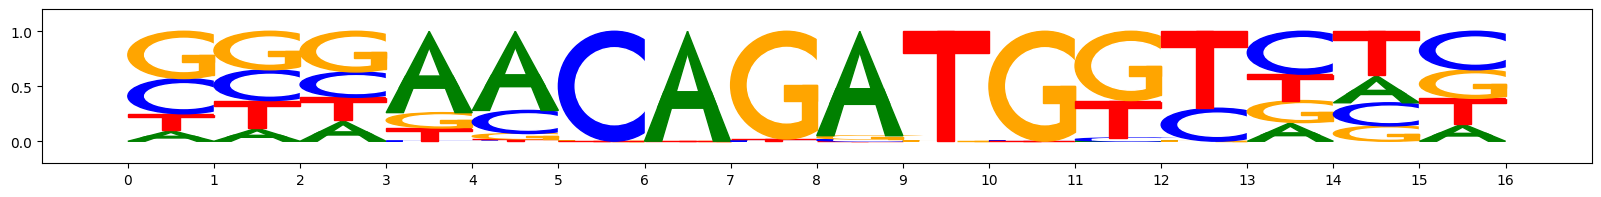

(<Figure size 2000x200 with 1 Axes>, <Axes: >)

In [40]:
plot_weights(pwm)

In [41]:
import torch.nn as nn

In [42]:
print(pwm.shape)

(16, 4)


In [44]:
print(pwm)

[[1.0015e-01 3.1993e-01 4.2982e-01 1.5010e-01]
 [1.2013e-01 2.7997e-01 3.4990e-01 2.5000e-01]
 [1.9006e-01 2.3002e-01 3.6988e-01 2.1004e-01]
 [7.3951e-01 2.5000e-04 1.4011e-01 1.2013e-01]
 [7.1953e-01 2.1004e-01 5.0200e-02 2.0230e-02]
 [2.5000e-04 9.9925e-01 2.5000e-04 2.5000e-04]
 [9.9925e-01 2.5000e-04 2.5000e-04 2.5000e-04]
 [2.5000e-04 2.5000e-04 9.7927e-01 2.0230e-02]
 [9.4930e-01 2.0230e-02 3.0220e-02 2.5000e-04]
 [2.5000e-04 2.5000e-04 2.5000e-04 9.9925e-01]
 [2.5000e-04 2.5000e-04 9.9925e-01 2.5000e-04]
 [2.5000e-04 3.0220e-02 6.2962e-01 3.3991e-01]
 [2.5000e-04 2.9995e-01 2.5000e-04 6.9955e-01]
 [1.7008e-01 3.8986e-01 2.0005e-01 2.4001e-01]
 [2.5000e-01 2.1004e-01 1.4011e-01 3.9985e-01]
 [1.6009e-01 3.4990e-01 2.5999e-01 2.3002e-01]]


In [45]:
print(pwm.dtype)

float64


In [48]:
# A naive version
def pwm_scan(sequence, pwm, stride=1):
    """
    sequence shape: (N, L, 4) # N is the number of sequences, L is the length of the sequence
    output length given by L_out = 1 + (seq_length - pwm_length) / stride
    """
    # transform frequencies into log scale to transform a multiplicative model
    # into an additive model
    pwm = np.log(pwm)

    # get lengths of arrays
    assert len(sequence.shape) == 3
    assert pwm.shape[1] == 4
    N, seq_length, _ = sequence.shape
    pwm_length, _ = pwm.shape

    # ensure that dimensions match without padding
    assert (seq_length - pwm_length) % stride == 0, "Size does not fit."
    L_out = int(1 + (seq_length - pwm_length) / stride)
    out = np.zeros((N, L_out))

    # Write the PWM scan (convolution) operation to get one score per position
    # store the output into `out` array which has dimensions N x L_out.
    for n in range(N):
    # go through every sequence
        for i in range(L_out):
            # go through every position in a given sequence
            start = i*stride
            # define the start position
            end = start + pwm_length
            # define the end position

            window = sequence[n, start:end, :]
            
            score = np.sum(window * pwm)  
            out[n, i] = score

    return out

In [50]:
scores = pwm_scan(x_test, pwm, stride = 1)

In [51]:
x_test.shape

(3200, 500, 4)

In [52]:
scores.shape

(3200, 485)

In [60]:
max_scores = np.max(scores, axis=1)

C:\Users\Yang Guo\AppData\Local\Temp\ipykernel_36396\1709333375.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([max_scores[y_test.flatten()], max_scores[~y_test.flatten()]], labels=['Binding','Not Binding'])


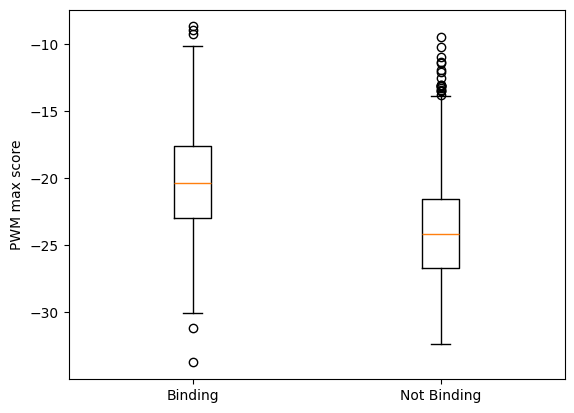

In [61]:
plt.boxplot([max_scores[y_test.flatten()], max_scores[~y_test.flatten()]], labels=['Binding','Not Binding'])
plt.ylabel("PWM max score")
plt.show()

In [62]:
mean_scores = np.average(scores, axis=1)

C:\Users\Yang Guo\AppData\Local\Temp\ipykernel_36396\40456239.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mean_scores[y_test.flatten()], mean_scores[~y_test.flatten()]], labels=['Binding','Not Binding'])


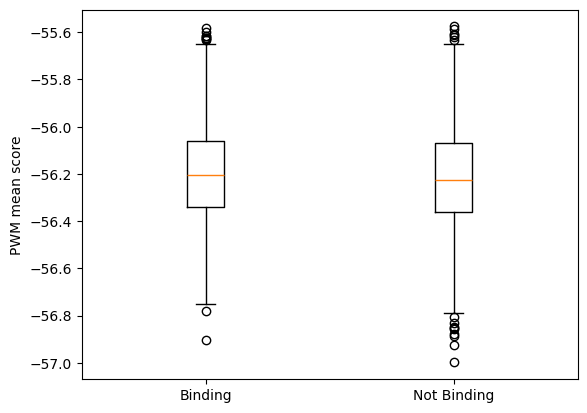

In [63]:
plt.boxplot([mean_scores[y_test.flatten()], mean_scores[~y_test.flatten()]], labels=['Binding','Not Binding'])
plt.ylabel("PWM mean score")
plt.show()

In [57]:
max_scores1 = np.max(scores)

In [58]:
max_scores1.shape

()

In [59]:
print(max_scores1)

-8.70427594154279


In [65]:
! pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [66]:
! pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 7.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 13.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 12.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 11.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/41.0 MB 28.1 MB/s eta 0:00:02
   ------ --------------------------------- 6.8/41.0 MB 18.1 MB/s eta 0:00:02
   -------- ------------------------------- 8.9/41.0 MB 14.3 MB/s eta 0:00:03
   ---------- ----------------------------- 10.7/41.0 MB 12.8 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/41.0 MB 12.1 MB/s eta 0:00:03


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
roc = {}
roc['mean_roc'] = roc_auc_score(y_test, mean_scores)
roc['max_roc'] = roc_auc_score(y_test, max_scores)

In [69]:
fpr = {}
tpr = {}
fpr['Mean'], tpr["Mean"], _ = roc_curve(y_test, mean_scores)
fpr['Max'], tpr["Max"], _ = roc_curve(y_test, max_scores)

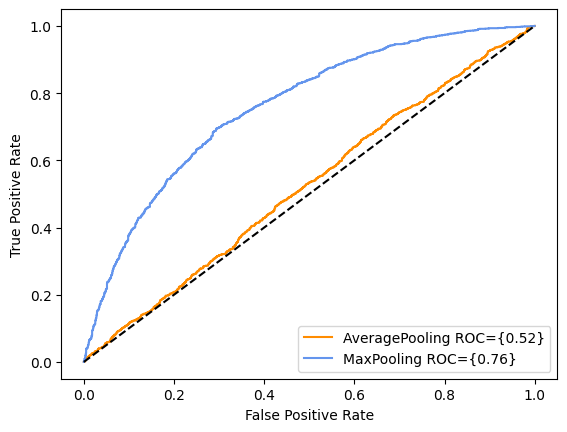

In [70]:
plt.plot(fpr['Mean'], tpr["Mean"], color='darkorange',
        label = 'AveragePooling ROC={%0.2f}' % roc['mean_roc'])
plt.plot(fpr['Max'], tpr["Max"], color='cornflowerblue',
        label = 'MaxPooling ROC={%0.2f}' % roc['max_roc'])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# CNN

Model achitecture: Conv1D --> GlobalMaxPooling1D --> Dense --> Sigmoid

In [71]:
## load the required modules
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [73]:
import torch.nn.functional as F

In [87]:
device = torch.device("cpu")

In [102]:
###################################################################
# Fill your code here
# Useful layers are:
# Conv: Conv1D
# Global Pool: AdaptiveMaxPool1d
# Dense: LazyLinear
class CNN(nn.Module):

  def __init__(self):
      super(CNN, self).__init__()
      self.conv = nn.Conv1d(in_channels=4,out_channels=16, kernel_size=16, stride=1, padding='same')
      self.pool = nn.AdaptiveMaxPool1d(output_size=1)
      self.dense = nn.LazyLinear(out_features=1)

  def forward(self, x):
      x = self.conv(x)
      x = F.relu(x)
      x = self.pool(x)
      x = x.squeeze(-1)
      x = self.dense(x)
      x = torch.sigmoid(x)
      return x

###################################################################

In [ ]:
# Choose loss function
criterion = nn.BCELoss()

In [104]:
from sklearn.model_selection import train_test_split

def train_model(x_train,
                y_train,
                model,
                criterion,
                lr=1e-3,
                n_epochs=10,
                batch_size=256,
                early_stopping_patience=None,
                verbose=False):

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    train_loader = DataLoader(TensorDataset(torch.from_numpy(x_train).float().swapaxes(2,1),
                                            torch.from_numpy(y_train).float()),
                              batch_size=batch_size, shuffle=True)

    val_loader = DataLoader(TensorDataset(torch.from_numpy(x_val).float().swapaxes(2,1),
                                          torch.from_numpy(y_val).float()),
                              batch_size=batch_size, shuffle=True)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    best_model_weights = model.state_dict()
    no_improvement_count = 0

    for epoch in range(n_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for i, batch in enumerate(val_loader):
                inputs, labels = batch
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_weights = model.state_dict()
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if verbose:
            print("Epoch: {}, Training Loss: {}, Validation Loss: {}".format(epoch+1, loss.item(), val_loss))

        if early_stopping_patience is not None and no_improvement_count >= early_stopping_patience:
            print("Stopping early after {} epochs with no improvement in validation loss.".format(early_stopping_patience))
            model.load_state_dict(best_model_weights)
            break

Train the Model

In [105]:
# Making sure our results are reproducible
# The model is namely initialized using random weights
from numpy.random import seed
seed(0)
torch.manual_seed(0)

# initialize
model = CNN()
# move the model to the GPU
model = model.to(device)

In [106]:
# train
train_model(x_train,
            y_train,
            model,
            criterion,
            lr=1e-3,
            n_epochs=300,
            batch_size=256,
            early_stopping_patience=3,
            verbose=True)

Epoch: 1, Training Loss: 0.6935248970985413, Validation Loss: 0.6925592839717865
Epoch: 2, Training Loss: 0.6906587481498718, Validation Loss: 0.689820659160614
Epoch: 3, Training Loss: 0.6792960166931152, Validation Loss: 0.6809087693691254
Epoch: 4, Training Loss: 0.6670762300491333, Validation Loss: 0.6669001340866089
Epoch: 5, Training Loss: 0.6447810530662537, Validation Loss: 0.6439605832099915
Epoch: 6, Training Loss: 0.596425473690033, Validation Loss: 0.6023404121398925
Epoch: 7, Training Loss: 0.5633236765861511, Validation Loss: 0.554427033662796
Epoch: 8, Training Loss: 0.5126421451568604, Validation Loss: 0.5025820851325988
Epoch: 9, Training Loss: 0.4487389624118805, Validation Loss: 0.4492929846048355
Epoch: 10, Training Loss: 0.39863643050193787, Validation Loss: 0.40385468304157257
Epoch: 11, Training Loss: 0.3539736866950989, Validation Loss: 0.3651521384716034
Epoch: 12, Training Loss: 0.32128435373306274, Validation Loss: 0.3341180205345154
Epoch: 13, Training Loss:

In [107]:
def predict(x_test,
            y_test,
            model,
            batch_size=256):

    test_loader = DataLoader(TensorDataset(torch.from_numpy(x_test).float().swapaxes(2,1),
                                            torch.from_numpy(y_test).float()),
                              batch_size=batch_size, shuffle=False)

    model.eval()
    preds = []
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            preds.append(model(inputs))
    preds = torch.cat(preds).cpu().numpy()
    return preds

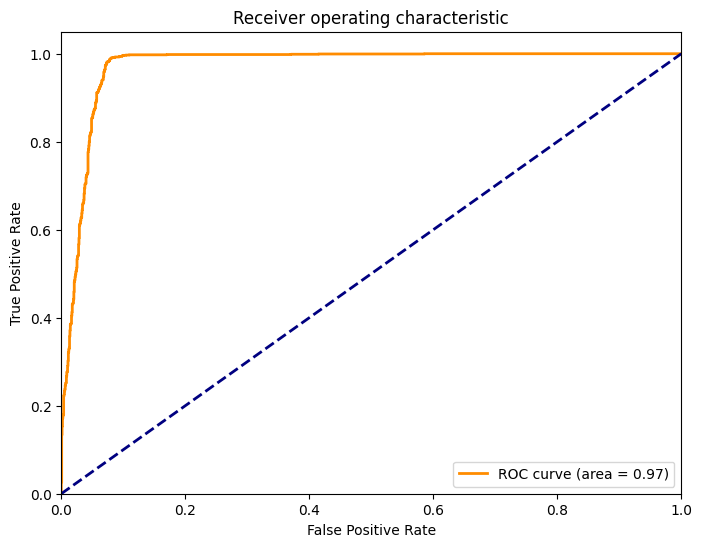

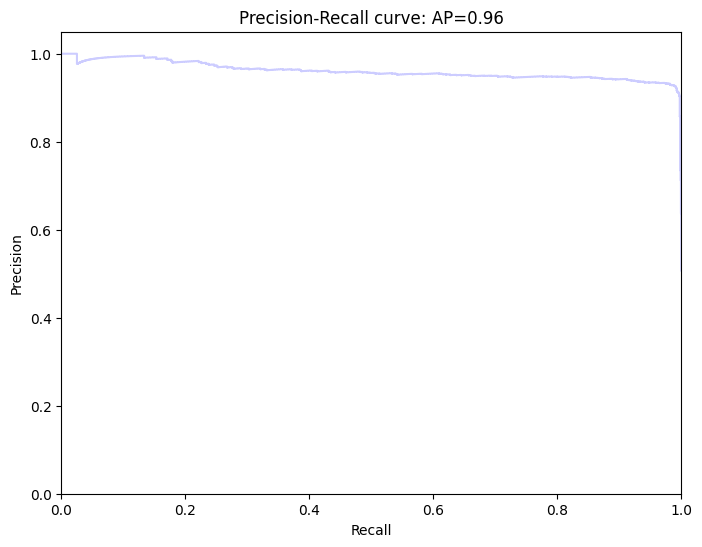

In [108]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    average_precision = average_precision_score(y_true, y_score)

    plt.figure(figsize=(8,6))
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    #plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Assuming y_pred contains the predicted probabilities for the positive class and y_true contains the true labels (0 or 1)
y_pred = predict(x_test, y_test, model)  # Replace with your own model
y_true = y_test  # Replace with your own true labels

# Plot the ROC curve
plot_roc_curve(y_true, y_pred)

# Plot the Precision-Recall curve
plot_precision_recall_curve(y_true, y_pred)